In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
import joblib

from sklearn.model_selection import StratifiedKFold


In [21]:
X_train = np.load('../artifacts/X_train.npz')['arr_0']
Y_train = np.load('../artifacts/Y_train.npz')['arr_0']
X_test = np.load('../artifacts/X_test.npz')['arr_0']
Y_test = np.load('../artifacts/Y_test.npz')['arr_0']

### 1. Logistic Regression

=== Logistic Regression ===
Accuracy : 0.7381
Precision: 0.5043
Recall   : 0.7861
F1-Score : 0.6144


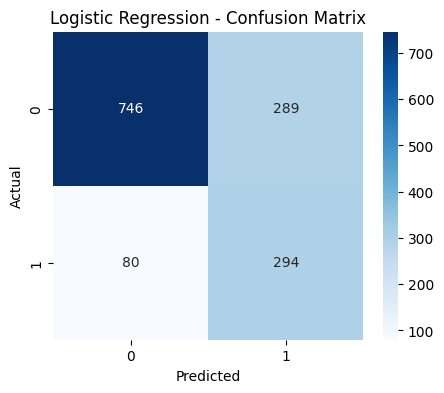

['../JoblibModels/logistic_regression_base.pkl']

In [17]:
model_lr = LogisticRegression(
    random_state=42,
    max_iter=1000
)

model_lr.fit(X_train, Y_train)

Y_hat_train_lr = model_lr.predict(X_train)
Y_hat_test_lr = model_lr.predict(X_test)

Y_proba_train_lr = model_lr.predict_proba(X_train)
Y_proba_test_lr = model_lr.predict_proba(X_test)

accuracy = accuracy_score(Y_test, Y_hat_test_lr)
precision = precision_score(Y_test, Y_hat_test_lr)
recall = recall_score(Y_test, Y_hat_test_lr)
f1 = f1_score(Y_test, Y_hat_test_lr)

print("=== Logistic Regression ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

cm = confusion_matrix(Y_test, Y_hat_test_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


joblib.dump(model_lr, "../JoblibModels/logistic_regression_base.pkl")

### 2. Decison Tree Classifier


=== Decision Tree ===
Accuracy : 0.7324
Precision: 0.4963
Recall   : 0.5401
F1-Score : 0.5173


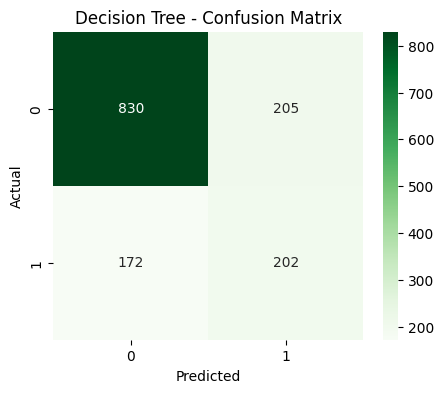

['../JoblibModels/decision_tree_base.pkl']

In [18]:
model_dt = DecisionTreeClassifier(random_state=42)

model_dt.fit(X_train, Y_train)

Y_hat_train_dt = model_dt.predict(X_train)
Y_hat_test_dt = model_dt.predict(X_test)

Y_proba_train_dt = model_dt.predict_proba(X_train)
Y_proba_test_dt = model_dt.predict_proba(X_test)

accuracy = accuracy_score(Y_test, Y_hat_test_dt)
precision = precision_score(Y_test, Y_hat_test_dt)
recall = recall_score(Y_test, Y_hat_test_dt)
f1 = f1_score(Y_test, Y_hat_test_dt)

print("\n=== Decision Tree ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

cm = confusion_matrix(Y_test, Y_hat_test_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


joblib.dump(model_dt, "../JoblibModels/decision_tree_base.pkl")

### K-Fold Validation

In [33]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def kfold_evaluation(model, X, Y):
    acc, f1s, recalls, precisions, roc_aucs = [], [], [], [], []
    
    for train_idx, val_idx in kfold.split(X, Y):
        X_tr, X_val = X[train_idx], X[val_idx]   # NumPy indexing
        Y_tr, Y_val = Y[train_idx], Y[val_idx]
        
        model.fit(X_tr, Y_tr)
        Y_pred = model.predict(X_val)
        acc.append(accuracy_score(Y_val, Y_pred))
        f1s.append(f1_score(Y_val, Y_pred))
        recalls.append(recall_score(Y_val, Y_pred))
        precisions.append(precision_score(Y_val, Y_pred))
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(X_val)[:,1]
            roc_aucs.append(roc_auc_score(Y_val, probs))
    
    print(f"Accuracy : {np.mean(acc):.4f}")
    print(f"F1-Score : {np.mean(f1s):.4f}")
    print(f"Recall   : {np.mean(recalls):.4f}")
    print(f"Precision: {np.mean(precisions):.4f}")
    if roc_aucs:
        print(f"ROC-AUC  : {np.mean(roc_aucs):.4f}")

print("Logistic Regression Validation Metrics: \n")
lr = LogisticRegression(random_state=42)
kfold_evaluation(lr, X_train, Y_train)

print("\nDecision Tree Classifier Validation: \n")
dt = DecisionTreeClassifier(random_state=42)
kfold_evaluation(dt, X_train, Y_train)



Logistic Regression Validation Metrics: 

Accuracy : 0.7724
F1-Score : 0.7808
Recall   : 0.8106
Precision: 0.7532
ROC-AUC  : 0.8513

Decision Tree Classifier Validation: 

Accuracy : 0.7998
F1-Score : 0.8009
Recall   : 0.8058
Precision: 0.7965
ROC-AUC  : 0.7999
